# Webscrapping using BeautifulSoup - Bayu Prakoso

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap Indonesian inflation rate from pusatdata.kontan.co.id, it's one of data center from indonesian economic newspaper that provide couple of useful financial information. To do this we will only use a couple default library from python and BeautifulSoup. 

This module is made as easy and simple as possible which can be used for new developer to learn how to webscrapping using Beautiful Soup. But to do webscrapping you will need a bit of knowlage in `html` which I'll also try to help to explain what you needed at this module, but it is always better if you understand a bit what in `html` first. You can read it quickly at [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc) documentation. It explain what is html and what beautiful soup exactly do at it landing page. 

## Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` and you are good to go. But here some libraries that needed to be installed first that I use at bis module : 

- beautifulSoup4
- pandas
- matplotlibs

## Background

At this project we try to scrap Indonesian inflation rate from Kontan data center website. Kontan is a business and financial regular publication in Indonesia published by PT Grahanusa Mediatama, owned by Kompas Gramedia. We will try to scrap this sites for educational purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Indonesia's inflation rate. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 2 points from this sites. One is inflation rate MoM, inflation rate MoM is measures month over month change in the price of goods and services. The other one is inflation rate YoY,  measures year over year (last 12 montha) change in the price of goods and services. 

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the .get() function here, but Requests allows you to use other functions like .post() and .put() to send those requests as well. At this case we will going to the Kontan data center inflation rate page, you can click [here](https://pusatdata.kontan.co.id/makroekonomi/inflasi) to follow what exactly that link goes to. 

### Getting the HTML from the Webpage

In [7]:
import requests
import pandas as pd


url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [8]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [9]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character. 

In [10]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


### Getting right key to extract right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="D:/ALGORITMA DATA SCIENCE/CAPSTONE DATA ANALYTICS/web_scraping-main/file capture web.png">

We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

In [11]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


<img src="D:/ALGORITMA DATA SCIENCE/CAPSTONE DATA ANALYTICS/web_scraping-main/file capture web.jpg">

![](D:/ALGORITMA DATA SCIENCE/CAPSTONE DATA ANALYTICS/web_scraping-main/file capture web.jpg)

As we can see from the line we just extract, we get all the content we needed. As for what is table, The table tag defines a table or a section in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the table tag.

The find() function can help you to get you the part of the html code that you needed. While most of the html is contained in table you can differsiate them with help of attrs=, you can insert anything that in the table a the attrs to help you find the part you needed.

Now I will introduce you to other useful function from beautiful soup, that's find_all. While the find fuction method is used for finding out the first tag with the specified name or id and returning an object of type bs4. The find_all method is used for finding out all tags with the specified tag name or id and returning them as a list of type bs4.

In [12]:
row = table.find_all('tr')

In [13]:
row 

[<tr>
 <th class="text-center">Date</th>
 <th class="text-center">Market Cap</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Open</th>
 <th class="text-center">Close</th>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>

As you can see get already get the necessary key to extract all needed data. To get the only text information you can add `.text`. Remember you need to only get one information before you use `.text` otherwise it will return error. Here is the example on how you use `.text`. 

In [14]:
row_length= len(row)

In [15]:
row_length

548

Get header column

In [16]:
row[0].find_all('th', attrs={'class':'text-center'})

[<th class="text-center">Date</th>,
 <th class="text-center">Market Cap</th>,
 <th class="text-center">Volume</th>,
 <th class="text-center">Open</th>,
 <th class="text-center">Close</th>]

In [17]:
row[1].find_all('th', attrs ={'class':'font-semibold text-center', 'scope':'row'})[0].text

'2021-06-30'

Get value Market Cap in first row

In [18]:
row[1].find_all('td', attrs ={'class':'text-center'})[0].text

'\n$253,607,549,372\n'

Get value Volume in first row

In [19]:
row[1].find_all('td', attrs ={'class':'text-center'})[1].text

'\n$27,149,143,847\n'

Get value Close in first row

In [20]:
row[1].find_all('td', attrs ={'class':'text-center'})[3].text

'\nN/A\n'

### Extracting the Information

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

Okay, okay now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the inflation rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [21]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    
    #get date 
    Date = row[i].find_all('th', attrs ={'class':'font-semibold text-center', 'scope':'row'})[0].text
    Date = Date.strip()
    
    #get market cap
    Market_cap = row[i].find_all('td', attrs ={'class':'text-center'})[0].text
    Market_cap = Market_cap.strip()
    
    #get volume
    Volume = row[i].find_all('td', attrs ={'class':'text-center'})[1].text
    Volume= Volume.strip()
    
    #get open
    Open = row[i].find_all('td', attrs ={'class':'text-center'})[2].text
    Open = Open.strip()
    
    #get close
    Close = row[i].find_all('td', attrs ={'class':'text-center'})[3].text
    Close = Close.strip()
    
    #scrapping process
    temp.append((Date, Market_cap, Volume, Open, Close))
temp

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

In [22]:
row

[<tr>
 <th class="text-center">Date</th>
 <th class="text-center">Market Cap</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Open</th>
 <th class="text-center">Close</th>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that. 

In [23]:
temp = temp[::-1]
temp

[('2020-01-01', '$14,097,451,632', '$7,103,187,151', '$129.19', '$130.48'),
 ('2020-01-02', '$14,230,588,104', '$6,623,732,041', '$130.48', '$127.05'),
 ('2020-01-03', '$13,859,793,330', '$6,497,297,884', '$127.05', '$133.70'),
 ('2020-01-04', '$14,613,194,776', '$9,655,245,100', '$133.70', '$134.14'),
 ('2020-01-05', '$14,636,213,160', '$6,958,393,690', '$134.14', '$135.01'),
 ('2020-01-06', '$14,738,834,254', '$7,260,645,128', '$135.01', '$143.81'),
 ('2020-01-07', '$15,692,578,635', '$9,514,201,882', '$143.81', '$143.02'),
 ('2020-01-08', '$15,656,491,188', '$9,440,938,788', '$143.02', '$140.27'),
 ('2020-01-09', '$15,364,547,562', '$10,095,847,759', '$140.27', '$137.86'),
 ('2020-01-10', '$14,998,595,868', '$7,280,640,218', '$137.86', '$144.60'),
 ('2020-01-11', '$15,647,071,448', '$10,273,370,788', '$144.60', '$142.18'),
 ('2020-01-12', '$15,564,837,468', '$9,737,605,323', '$142.18', '$145.42'),
 ('2020-01-13', '$15,859,031,094', '$8,488,793,478', '$145.42', '$143.59'),
 ('2020-01

Then after we fix our list a bit, as usual we will input it to pandas' dataframe.

### Creating Pandas Dataframe and Data Wrangling 

In [32]:
import pandas as pd

data = pd.DataFrame(temp, columns = ('Date', 'Market_Cap', 'Volume', 'Open', 'Close'))

data.head()

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,"$14,097,451,632","$7,103,187,151",$129.19,$130.48
1,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
2,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
3,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
4,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01


Let's check our dataframe data types to see if our data is useable. 

In [30]:
data.dtypes

Date          object
Market_Cap    object
Volume        object
Open          object
Close         object
dtype: object

Usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change the inflation to float datatype, but before we can do that we need to change the "," to "." first. To do this we can use the help of `str.replace()`. Then lastly let's fix our period data type.

In [42]:
data.loc[(data['Close'] == 'N/A', 'Close')] = 0

In [43]:
data['Market_Cap'] = data['Market_Cap'].str.replace(",","")
data['Market_Cap'] = data['Market_Cap'].str.replace("$","")


data['Volume'] = data['Volume'].str.replace(",","")
data['Volume'] = data['Volume'].str.replace("$","")


data['Open'] = data['Open'].str.replace(",","")
data['Open'] = data['Open'].str.replace("$","")


data['Close'] = data['Close'].str.replace(",","")
data['Close'] = data['Close'].str.replace("$","")

<ipython-input-43-ed1506df4bae>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Market_Cap'] = data['Market_Cap'].str.replace("$","")
<ipython-input-43-ed1506df4bae>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Volume'] = data['Volume'].str.replace("$","")
<ipython-input-43-ed1506df4bae>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Open'] = data['Open'].str.replace("$","")
<ipython-input-43-ed1506df4bae>:14: FutureWarning: The default value of regex will change from True to False in a future vers

In [47]:
data['Date'] = data['Date'].astype('datetime64')

data['Market_Cap'] = data['Market_Cap'].astype('float64')

data['Volume'] = data['Volume'].astype('float64')

data['Open'] = data['Open'].astype('float64')

data['Close'] = data['Close'].astype('float64')

In [48]:

data.dtypes

Date          datetime64[ns]
Market_Cap           float64
Volume               float64
Open                 float64
Close                float64
dtype: object

In [51]:
data.head(5)

,Date,Market_Cap,Volume,Open,Close
0,2020-01-01,1.409745e+10,7.103187e+09,129.19,130.48
1,2020-01-02,1.423059e+10,6.623732e+09,130.48,127.05
2,2020-01-03,1.385979e+10,6.497298e+09,127.05,133.70
3,2020-01-04,1.461319e+10,9.655245e+09,133.70,134.14
4,2020-01-05,1.463621e+10,6.958394e+09,134.14,135.01


To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` 

In [53]:
data = data.set_index('Date')

And done, We can do our simple visualisation to put the cherry on top.

In [56]:
data_volume = data.drop(['Market_Cap','Open','Close'], axis=1)

<AxesSubplot:xlabel='Date'>

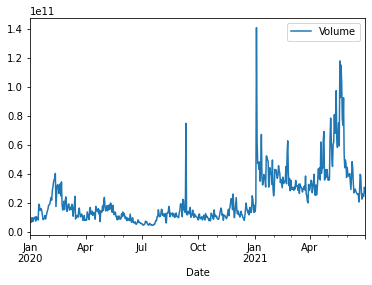

In [61]:
data_volume.plot()

Analysis :

In general the trend of ethereum volume has increased.
The highest increase occurred in the period of May and June 2021
seeing the pattern of ethereum volume is very profitable if we want to invest here


In [58]:
data_market_cap = data.drop(['Volume','Open','Close'], axis=1)b

<AxesSubplot:xlabel='Date'>

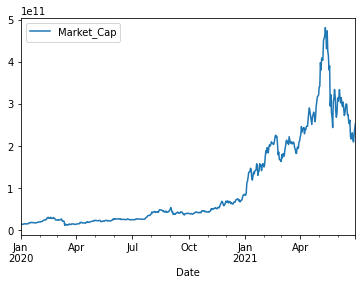

In [60]:

data_market_cap.plot()

The market cap or market cap on a type of coin is metric information that includes the number of coins available and the price of the coin. In the world of crypto assets, the market cap is an excellent indicator of coin stability.

based on market cap ethereum above:

the pattern of the market cap value tends to increase
the market cap value rose in May and then dropped slightly and this is a sign that it is in the correction stage of the pattern before it can rise drastically
the pattern on the market cap is positively correlated with volume
We already finish our web scrapping job, now we have all the data we need and we can move on to the next part of the project using pandas usual. In conclusion when you don't have a direct access to a data from a website you can always do the scrapping method. There is a couple library that can do same task like scrapy that can build bot to automaticly crawl data, but we choose beautiful soup since it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage (for example, a list of images).

